In [1]:
# Visualize some counter intuitive properties in high dimensions

# 1 - distances between images can't always be seen? with MNIST
# 2 - with CIFAR10

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from scipy import stats

import sys
sys.path.append('/home/felix/Research/Adversarial Research/FGN---Research/')
import Finite_Gaussian_Network_lib as fgnl
import Finite_Gaussian_Network_lib.fgn_helper_lib as fgnh

In [5]:
# load MNIST data
batch_sizefor_train = 50000
batch_size_for_val = 10000
(mnist_train_loader, mnist_val_loader, mnist_test_loader) = fgnh.mnist_dataloaders(batch_size=batch_sizefor_train,
                                                                 
                                                                                   batch_size_for_val=batch_size_for_val)

In [6]:
# show examples
x1 = mnist_train_loader.dataset.tensors[0][0]

In [7]:
plt.imshow(x1, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

In [8]:
white_noise_dataloader = fgnh.mnist_random_dataloader(num_samples=1, batch_size=1)

In [9]:
# show examples
x2 = mnist_train_loader.dataset.tensors[0][1]
plt.imshow(x2, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

In [10]:
#  euclidean distance between the two
d = np.linalg.norm(x1.numpy().flatten()-x2.numpy().flatten(), ord=2)
print(d)

30.34482


In [11]:
#  divide d into 28*28 pixels
# per pixel d
ppd = d/np.sqrt(28*28)
print(ppd)

1.0837435722351074


In [12]:
# define the new image that will be as far from x1 as x2 is far from x1
middle = (np.max(x1.numpy())+np.min(x1.numpy()) )/2
x3 = np.array([min(x+ppd, np.max(x1.numpy()))
               if x<middle
               else
               max(x-ppd, np.min(x1.numpy()))
               for x in x1.numpy().flatten()])
x3 = np.reshape(x3, x1.shape)

In [13]:
print(np.max(x1.numpy()))
print(np.min(x1.numpy()))
print(np.max(x2.numpy()))
print(np.min(x2.numpy()))
print(np.max(x3))
print(np.min(x3))

2.8170278
-0.42451692
2.8170278
-0.42451692
2.2736430168151855
0.14429187774658203


In [14]:
# show an example
plt.imshow(x3, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

In [15]:
np.linalg.norm(x1.numpy().flatten()-x3.flatten(), ord=2)

30.344820022583008

In [16]:
x4 = white_noise_dataloader.dataset.tensors[0][0]

In [17]:
np.linalg.norm(x1.numpy().flatten()-x4.numpy().flatten(), ord=2)

49.23644

In [18]:
x4 = x4*0.27

In [19]:
np.linalg.norm(x1.numpy().flatten()-x4.numpy().flatten(), ord=2)

29.807972

In [20]:
# show an example
plt.imshow(x4, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

In [21]:
x5 =  x1.numpy().flatten()
cur_d = np.linalg.norm(x1.numpy().flatten()-x5, ord=2)
# print(cur_d)
while cur_d<d:
    # pick random pixel and add noise
    i = np.random.choice(range(len(x5)))
#     print(i)
    x5[i] = min(max(np.min(x1.numpy()),x5[i]+ppd/100 ), np.max(x1.numpy()))
    cur_d = np.linalg.norm(x1.numpy().flatten()-x5, ord=2)
#     print(cur_d)

x5 = np.reshape(x5, x1.shape)

In [22]:
# show an example
plt.imshow(x5, vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

In [23]:
np.linalg.norm(x1.numpy().flatten()-x5.flatten(), ord=2)

30.345057

<IPython.core.display.Javascript object>


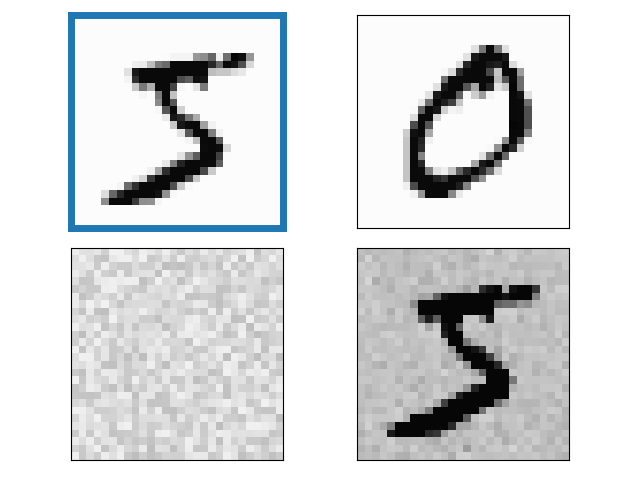

In [30]:
fig=plt.figure()
columns = 2
rows = 2

# ax enables access to manipulate each of subplots
ax = []

images = [x1,x2,x4,x5]

for i in range(columns*rows):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(images[i], vmax=2.9, vmin=-0.5, cmap=plt.cm.get_cmap('Greys'))
    
    if i==0:
        ax[i].spines['bottom'].set_color('tab:blue')
        ax[i].spines['top'].set_color('tab:blue')
        ax[i].spines['left'].set_color('tab:blue')
        ax[i].spines['right'].set_color('tab:blue') 
        ax[i].spines['bottom'].set_linewidth(5)
        ax[i].spines['top'].set_linewidth(5)
        ax[i].spines['left'].set_linewidth(5)
        ax[i].spines['right'].set_linewidth(5)
    ax[i].tick_params(axis='both', which='both',
                          labelbottom='off', labelleft='off', bottom='off', left='off')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)    
plt.tight_layout()

plt.show()

In [25]:
### part 2, same with Cifar 10

In [26]:
import torchvision

In [38]:
trainset = torchvision.datasets.CIFAR10(root='/home/data/cifar10', train=True,
                                        download=False)

testset = torchvision.datasets.CIFAR10(root='/home/data/cifar10', train=False,
                                       download=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [149]:
img1=trainset.data[7]/256
img2=trainset.data[1]/256
d12=np.linalg.norm(img1-img2)
print(d12)

18.869304277606485


In [150]:
img3 = 0.84*np.reshape([np.random.rand() for x in img1.ravel()], img1.shape)
d13=np.linalg.norm(img1-img3)
print(d13)

18.780474022530374


In [167]:
import copy

In [172]:
img4=img1.ravel()
cur_d = np.linalg.norm(img1.ravel()-img4)
print(cur_d)
while cur_d<d12:
    # pick random pixel and add noise
#     i = np.random.choice(range(int(len(img4)/3)))
    s = np.random.choice([-1,1])
#     img4[3*i] = min(max(0,img4[3*i]+s*1e-1),1)
#     img4[3*i+1] = min(max(0,img4[3*i-1]+s*1e-1),1)
#     img4[3*i+2] = min(max(0,img4[3*i-2]+s*1e-1),1)
    i = np.random.choice(range(len(img4)))
    t1 = copy.deepcopy(img4)
    t2 = copy.deepcopy(img4)
    t1[i] = min(max(0,img4[i]-s*1e-1),1)
    t2[i] = min(max(0,img4[i]+s*1e-1),1)

#     t1[3*i] = min(max(0,img4[3*i]+s*1e-1),1)
#     t1[3*i+1] = min(max(0,img4[3*i+1]+s*1e-1),1)
#     t1[3*i+2] = min(max(0,img4[3*i+2]+s*1e-1),1)
    
#     t2[3*i] = min(max(0,img4[3*i]-s*1e-1),1)
#     t2[3*i+1] = min(max(0,img4[3*i+1]-s*1e-1),1)
#     t2[3*i+2] = min(max(0,img4[3*i+2]-s*1e-1),1)

    if np.linalg.norm(img1.ravel()-t1)>cur_d:
        img4 = t1
    elif np.linalg.norm(img1.ravel()-t2)>cur_d:
        img4 = t2

    cur_d = np.linalg.norm(img1.ravel()-img4)
    print(cur_d)

img4 = np.reshape(img4, img1.shape)

0.0
0.09999999999999998
0.14142135623730948
0.17320508075688767
0.19999999999999996
0.2236067977499789
0.24494897427831774
0.26457513110645897
0.28284271247461895
0.29999999999999993
0.3162277660168379
0.3316624790355399
0.3464101615137754
0.36055512754639885
0.37416573867739406
0.3872983346207416
0.3999999999999999
0.41231056256176596
0.42426406871192845
0.4358898943540673
0.44721359549995787
0.4582575694955839
0.46904157598234286
0.47958315233127186
0.48989794855663554
0.4999999999999999
0.5060667106469263
0.5158522226616843
0.5254555315390637
0.5348864511510829
0.5441539447849293
0.5532662249089491
0.562230838379575
0.5710547396047071
0.5797443536809995
0.5883056311348718
0.5967440955929098
0.6050648854668397
0.6132727905467515
0.6213722842427073
0.6293675520909858
0.6372625170406618
0.6450608619541258
0.6527660496877881
0.6603813410636311
0.6679098109962152
0.6753543630013801
0.6827177422808052
0.6900025475496447
0.6972112417517375
0.7043461617876539
0.711409527364513
0.71840344906

2.5452266521741245
2.547190356243031
2.5491525476003787
2.5511132297366776
2.553072406129035
2.5542674539997767
2.5562242128894916
2.5620855228821893
2.5626691064627813
2.5646194550495696
2.570461621814018
2.5724060622729747
2.5782305849591403
2.5801691706589223
2.582106300913801
2.5879089916801075
2.589840332765468
2.5917702346501996
2.593698700546914
2.5956257336562896
2.5975513371671313
2.599475514256434
2.6013982680894427
2.6033196018197136
2.605239518589174
2.605239518589174
2.6071580215281833
2.609075113755591
2.6109907983787974
2.6129050784938115
2.6148179571853087
2.6167294375266907
2.6186395225801418
2.6205482153966853
2.622455519016243
2.6243614364676886
2.625524036234243
2.6274277278059905
2.629330041064406
2.631230978998946
2.6331305445882762
2.635028740800326
2.6369255705923424
2.638821036910944
2.6407151426921747
2.6426078908615542
2.644499284334135
2.6463893260145515
2.648278018797073
2.6501653655656567
2.655819358473718
2.657701349821637
2.6633393446655935
2.66521602592

3.8698825047520424
3.8737566522157714
3.8750471739820074
3.876337266103911
3.877626929010312
3.878916163129327
3.880204968888363
3.881493346714115
3.882781297032572
3.8840688202690155
3.885355916848023
3.8892146508756675
3.8905000450566685
3.8917850146926076
3.8930695602038683
3.8969206561830254
3.898203509385566
3.8994859405549778
3.900767950107509
3.900767950107509
3.9046114532160483
3.9058917804498807
3.9071716881378453
3.90845117669211
3.9122871316642827
3.9161193292066496
3.9173958953092733
3.921223100078079
3.9219402851886898
3.923214957223978
3.9270364908650826
3.9308543092546615
3.9321260916437994
3.9336559702129765
3.9349268470954057
3.9361973136508532
3.9374673702765066
3.9387370173689167
3.9400062553239925
3.941275084537007
3.9425435054025963
3.9463463218516686
3.9476131132612515
3.951411050750376
3.95210800900529
3.9533729541802343
3.954637494745094
3.960954141976874
3.9622162630078326
3.963477982131824
3.96473929973255
3.965210035420571
3.965210035420571
3.966470802237173


5.220682884944866
5.221640526228922
5.222597991915159
5.223555282100138
5.22451239688033
5.225469336352119
5.228339103879573
5.229295343079817
5.2302514074522515
5.231207297092733
5.237893640114913
5.240756604265862
5.241710578156357
5.241817761271639
5.248490587052892
5.251347773894128
5.256106300521596
5.257057488974494
5.258008505354742
5.258959349755692
5.259910022270611
5.262761009430584
5.263710995332363
5.266559924882922
5.267509225657114
5.2684583553809
5.269407314146707
5.272253165619308
5.273201441475834
5.273643630230609
5.274591656106837
5.279329231888449
5.280276236966384
5.281223072231647
5.282169737775555
5.285008716991097
5.2859547045611235
5.288791652038476
5.289736963089174
5.290682105236703
5.291627078571569
5.296349416217917
5.297293378572861
5.300124256908688
5.30295362403556
5.307665884234979
5.308607834326423
5.308607834326423
5.309549617309539
5.310491233273234
5.311432682306336
5.312373964497593
5.315196810906617
5.321777629577533
5.324595490614463
5.3255344462

6.142655268295395
6.14672382209557
6.150789684676039
6.154852861370219
6.155665174870801
6.159725135516776
6.163782421948164
6.166215512380115
6.167026329205767
6.16945814031647
6.171888993259452
6.172699064843285
6.176747829166832
6.17755726360486
6.183220337746114
6.18564578238337
6.189686078075137
6.190493820780146
6.197758767902892
6.200178525261767
6.200984901216675
6.203403400160042
6.204019092916576
6.2048249697532505
6.207241972508677
6.208047430978071
6.21046317960854
6.212877988925376
6.21850889725772
6.2193128965564535
6.224937984050397
6.2257411530896
6.226544218527113
6.230557993091263
6.231360437759432
6.232162779105935
6.234569183614327
6.236974659662601
6.237776278873219
6.240180518644746
6.2425838324585925
6.244986221383792
6.245786812345857
6.246587300700552
6.248988150514723
6.252987518400578
6.258582339897225
6.260978590066685
6.263373923475543
6.267364111432606
6.269757005281258
6.270554433642484
6.2713517606073905
6.27374313351076
6.274540055276835
6.2769302135098

7.015954761528916
7.016667386717163
7.017379939537282
7.020941618887047
7.021653737960899
7.022365784820687
7.027348092689039
7.029482286471762
7.030193540424066
7.032326870660967
7.034459553925964
7.034459553925964
7.039433302178541
7.040050655529535
7.040760841870844
7.042280843762327
7.042280843762327
7.042990805220594
7.043700695119138
7.043780457939358
7.048747629164233
7.052293466642493
7.054420113634316
7.055128853511351
7.058671485460164
7.0593797985126425
7.060088040502639
7.06645902412576
7.067937619100777
7.068645003641077
7.069352317397963
7.070059560392681
7.070766732646464
7.072887825174379
7.073594714676545
7.075714959458158
7.076421566547598
7.077128103086729
7.0778345690966775
7.078540964598563
7.079247289613491
7.081365841947439
7.082071885225393
7.082777858121767
7.086306667616069
7.091244050764291
7.091949110611268
7.095473358945121
7.096177998577823
7.099700147717504
7.1004043678863775
7.1039244215785375
7.106035616818984
7.106739209194323
7.107442731918418
7.10814

7.8727161401785635
7.87310376785757
7.875008758055642
7.875643652391407
7.877548028381233
7.877548028381233
7.878182718079917
7.878182718079917
7.8800864804552155
7.88198978300867
7.883892626073306
7.8857950099817495
7.886429035973953
7.888330808190859
7.890232122026136
7.892132977811072
7.894033375876559
7.895933316553089
7.896566528527006
7.898465859865007
7.901630397547905
7.903528511965593
7.905426170640838
7.909852270393743
7.914275894827843
7.916170977148805
7.916802570448063
7.918697048091501
7.921853504038879
7.923746774061692
7.926901219231451
7.928793283940064
7.931945722170132
7.937616955954291
7.938246842940389
7.940136204086996
7.940967923220514
7.9415975444249955
7.9422271157161655
7.942856637105892
7.94474490198503
7.9452627210829965
7.946019972189689
7.946649193115135
7.948536557029692
7.950423472899883
7.952309941044642
7.952938664320091
7.953173348330444
7.9575728905611465
7.9594576642252255
7.961341991686683
7.961970001739123
7.961970001739123
7.9663646858899
7.96699

8.689788894459598
8.691514886961498
8.693240536777603
8.693240536777603
8.694965844111945
8.696690809168356
8.700714397695936
8.702438223295431
8.706459155723028
8.709330113750044
8.711052234390134
8.711810354251142
8.713531984702724
8.71640061312222
8.718121337102243
8.718694836295017
8.719268297766586
8.720988455928458
8.72385463246823
8.727865698350165
8.728438557292904
8.728438557292904
8.730156908580591
8.731874921712828
8.733315286787567
8.73617741912545
8.736749733077938
8.737322009542593
8.739038614083212
8.739610740670171
8.740182829806104
8.74028845129919
8.74028845129919
8.741256129173896
8.741828110631108
8.74240005466578
8.742902708958864
8.744618217985291
8.746247451474364
8.746819106533632
8.748533847589652
8.75024825261671
8.753104848133706
8.75367605537364
8.754247225342782
8.757102516381877
8.757673462879385
8.759386079082358
8.761098360503768
8.761669046615593
8.764521919786715
8.766233198040183
8.766616999070871
8.770608508444461
8.77117857579005
8.77174860608752
8.

9.468489966520197
9.469018019102807
9.469018019102807
9.469018019102807
9.469546042239493
9.469546042239493
9.471129935023257
9.471189254962663
9.47212182770815
9.472649677832765
9.474233051753856
9.474760784259685
9.475163907769694
9.476746861613506
9.47727445414036
9.477802017298181
9.478329551091871
9.479911976337199
9.48043939272339
9.480966779769954
9.482548764920825
9.482548764920825
9.484130486191207
9.484657667997377
9.485184820503049
9.487820143694833
9.488347120500043
9.488347120500043
9.492035138952101
9.493615279707802
9.497301252413838
9.497301252413838
9.497301252413838
9.498880517150505
9.501512041727961
9.506246950248109
9.507824729090322
9.510453778821569
9.510979501560366
9.512556495448605
9.515184237790745
9.519304053249009
9.52087966829762
9.522455022640065
9.525080034215094
9.525604949723824
9.52680448325194
9.532575919556542
9.53519814487928
9.53572250341364
9.539392206116135
9.539916334125225
9.543584424214481
9.547251105009718
9.549869300786753
9.550392853810218

10.2178500893886
10.220296495171684
10.221764057598797
10.221764057598797
10.2242095268641
10.226654411351673
10.229098711480823
10.231542427670357
10.233985560338583
10.237404966553713
10.238870076781843
10.240334977393006
10.241799668477148
10.24326415012415
10.246680459993794
10.247168411284095
10.248632125762862
10.2510711854527
10.254484894387364
10.255947564667958
10.2561625493777
10.256650049565778
10.259087203024336
10.261058517492916
10.262520250864986
10.263007449057705
10.264468904888062
10.265930152665852
10.268365103531035
10.270799477130003
10.272259824372334
10.27329604227706
10.273782729465593
10.273782729465593
10.275242652719472
10.275729247711107
10.278161877119153
10.278648333913633
10.280107566181664
10.281566591345188
10.283025409492359
10.284484020711272
10.284970178482071
10.285555175277208
10.287985481311283
10.287985481311283
10.288312514190475
10.290742169039525
10.290803377544112
10.295175285310751
10.295175285310751
10.295660938243515
10.29808885935994
10.2

11.01830358612502
11.019664873126382
11.021933311176197
11.023294149936103
11.024242058475815
11.025602612277801
11.027869828931925
11.027869828931925
11.029229935216105
11.032402864465523
11.032856065582795
11.032856065582795
11.035121791981593
11.036481004553355
11.038745986925646
11.04010475330135
11.04010475330135
11.042368992379627
11.044341089117689
11.044341089117689
11.045699167222205
11.047962259746061
11.048414822623801
11.049772400043961
11.050224888787255
11.050984030704003
11.051929564321627
11.05238196474979
11.05283434666088
11.056000501751365
11.056000501751365
11.058261486089322
11.059617854823305
11.061878099795099
11.064137883031213
11.065145037114638
11.066500562164297
11.067855921197324
11.069211114274706
11.069211114274706
11.070566141457386
11.071921002806274
11.07237258641447
11.07237258641447
11.072824151605708
11.075081701386345
11.075533156123125
11.078692824173016
11.078692824173016
11.080046691796143
11.081400394010798
11.081400394010798
11.08275393087759
1

11.72674896274971
11.727232060540018
11.729363657153684
11.730642429200444
11.733625688667493
11.736608189837371
11.737886172635928
11.737886172635928
11.740867591526518
11.741293446710106
11.741293446710106
11.741719286448543
11.742996713009745
11.744274000625056
11.746402504671705
11.747679421986184
11.750658356098933
11.751934810989962
11.754061927765978
11.75448730492988
11.755763344069056
11.755763344069056
11.755763344069056
11.757889768226171
11.760015807887235
11.762141463260747
11.762141463260747
11.763416672113491
11.763416672113491
11.763841711012507
11.766816553416547
11.769790643922164
11.77191453425303
11.772339266337752
11.77253016265679
11.772954872531532
11.776776572163707
11.776776572163707
11.778899202839964
11.782859974750195
11.784981509725426
11.785029182899665
11.785453442349883
11.789271090351463
11.790240321795947
11.792360528990919
11.792360528990919
11.796175941622055
11.798295082159242
11.801261239617697
11.803106539153548
11.804377322612542
11.8073419521333

12.424859114832545
12.42687104718792
12.42687104718792
12.42968720537397
12.43169835635652
12.432100547511567
12.434111308148942
12.435317608466516
12.43652379177708
12.437729858114677
12.4381318542391
12.4381318542391
12.440141640007052
12.442151101133492
12.443356622046856
12.444562026179844
12.446570773648354
12.446972484240389
12.44898084276128
12.452595071848975
12.452996588108316
12.455806839520166
12.458616457032353
12.458616457032353
12.458672893749052
12.46228431201268
12.462359759154822
12.464365638354863
12.465569010943762
12.46837642865347
12.46877743672576
12.469178431901655
12.471183214378716
12.47158413220235
12.47198503713829
12.47198503713829
12.473187674632392
12.475191812818005
12.476394141201272
12.47679489158179
12.478798450435901
12.480000431354217
12.480000431354217
12.480000431354217
12.482804603397485
12.484807197814527
12.484807197814527
12.485207678152632
12.486409042098591
12.487610290467966
12.48881142329411
12.48881142329411
12.491613617407538
12.492814365

13.137845160598713
13.139747922386755
13.140128441680739
13.140128441680739
13.140409457767035
13.142311848292648
13.142323830250858
13.144225943705456
13.146127781943227
13.148789893339218
13.14908102907498
13.150982165191296
13.150982165191296
13.151130679876143
13.151510869827069
13.152651373741325
13.153824653968275
13.154964957282996
13.157113985882308
13.159773874861978
13.16015381511553
13.16129357006749
13.163192942348747
13.164332434176062
13.16623136806808
13.16813002812092
13.170028414453018
13.17192652718272
13.17610141269032
13.181033663468881
13.181627307048016
13.182006617427938
13.18238591689357
13.182765205445856
13.182765205445856
13.183903005632054
13.185040707632037
13.185040707632037
13.187694963939451
13.191106794424565
13.193759830386254
13.194896682502442
13.195267100462155
13.195267100462155
13.19640382272909
13.198298142281033
13.199434603517643
13.202085965957764
13.202085965957764
13.205494078319786
13.20814422439954
13.209279838527872
13.210415355034788
13.

13.79467102211569
13.795758355683036
13.797570387876204
13.797570387876204
13.798535609293378
13.800941678412288
13.802028517972907
13.803839727080918
13.804926338482845
13.808185659634555
13.810720155405994
13.812530224797243
13.814340057018192
13.815425842547793
13.817959010321944
13.819768131590969
13.823023953207104
13.823756217537762
13.826287859071716
13.82881903713813
13.830626737856601
13.83123828389274
13.831603861478222
13.834134066896246
13.834990858179065
13.838965714456348
13.840772089948535
13.842578229719285
13.845106429561973
13.849078382545834
13.849078382545834
13.851605395978414
13.851605395978414
13.851605395978414
13.854131948480147
13.855214615656385
13.85587187970771
13.85767605144798
13.858036857609914
13.859119219736689
13.861377039728048
13.861737749557227
13.862819822730867
13.864623090351207
13.864623090351207
13.866448659894857
13.866448659894857
13.866448659894857
13.86753036547964
13.869816234116582
13.87122575444088
13.873027929427085
13.874109122054069


14.446233133014237
14.447271428660788
14.449693828361841
14.450731875354906
14.450731875354906
14.453845569031042
14.455575109050429
14.455839335491888
14.455937374179884
14.459049946874478
14.459395746925624
14.460433097463257
14.460568691272133
14.461605957672885
14.465408631455936
14.465408631455936
14.467827994381183
14.468864740365772
14.47197453269594
14.472320023928432
14.474047356389294
14.474392798145278
14.475429073951483
14.477156035458066
14.478192113485713
14.478192113485713
14.48060934059751
14.483026164272433
14.484228883600913
14.485954796027045
14.486299953837037
14.487272014255787
14.488307368876425
14.490032795512883
14.490377856185772
14.491412988906188
14.493828011089374
14.495552780595812
14.498656848654601
14.500381043787744
14.500789857595361
14.501824247112516
14.504926973071615
14.50665042296603
14.507703578952993
14.508048219342445
14.509771298499695
14.512183265613947
14.513905853861857
14.513905853861857
14.513905853861857
14.516317133996678
14.516317133996

15.140630704172038
15.140630704172038
15.144262878070926
15.14657380796453
15.148224256331732
15.151854609918784
15.151854609918784
15.152844555400055
15.15340274077157
15.153732696072717
15.155382364824165
15.155382364824165
15.157691599449546
15.158681163743214
15.158681163743214
15.161649469105376
15.161649469105376
15.163957749348397
15.1642874749862
15.165276608885948
15.166925022034734
15.167913983934088
15.168902881356427
15.169891714314353
15.17219874059206
15.17450541612554
15.17450541612554
15.17450541612554
15.17450541612554
15.17477138290516
15.175759833479091
15.177407108048376
15.18037175181943
15.181359837756213
15.181359837756213
15.181689185444332
15.18399441923756
15.185640800553573
15.185970055397757
15.188274639452546
15.189212725732
15.192175065721791
15.193162384031144
15.195465877278622
15.197111015832546
15.198144277428707
15.198144277428707
15.199789126087866
15.199789126087866
15.200775949850025
15.201762709552433
15.203407166735321
15.204158756124759
15.20711

15.775969142736619
15.776919927304505
15.778504440934128
15.778821324565977
15.778963749926172
15.778963749926172
15.778963749926172
15.779280624334058
15.779597492378702
15.781181737166714
15.78403297707795
15.78403297707795
15.786250252085967
15.786250252085967
15.78910057671064
15.78910057671064
15.791950386873822
15.79419238395947
15.795775164945953
15.797357787349227
15.797357787349227
15.798940251216957
15.798940251216957
15.80052255659677
15.801471863770265
15.804952168909697
15.805901210039348
15.808115417769548
15.808115417769548
15.808115417769548
15.808115417769548
15.810961800647148
15.811156532601826
15.811156532601826
15.811156532601826
15.81210520134613
15.814318540437883
15.814318540437883
15.814318540437883
15.815899307293195
15.815899307293195
15.816847691573608
15.819060367115279
15.823800772837018
15.825380592530385
15.825380592530385
15.826328408649852
15.826328408649852
15.826328408649852
15.827907976054112
15.827907976054112
15.829487385839043
15.830434956072349


16.389629211141745
16.39115449499244
16.392069597177496
16.393594653971128
16.395119568905585
16.396034449790317
16.396034449790317
16.3975591378324
16.40030321910881
16.401217810842912
16.40335165991118
16.40548523143131
16.407009041221098
16.40792325916692
16.410056236305554
16.41196312356739
16.413486331956893
16.414400189142942
16.41775056362277
16.418664183463154
16.41957775246781
16.422318154552233
16.426275705994218
16.426275705994218
16.427143095299236
16.427143095299236
16.427143095299236
16.427143095299236
16.428056192789136
16.430148590771893
16.431061521242125
16.43440849908641
16.43471273600009
16.43471273600009
16.43471273600009
16.435693148673213
16.43964748032462
16.43964748032462
16.43964748032462
16.439978666639753
16.441499279553863
16.442411579800883
16.44332382943212
16.44419031949192
16.44419031949192
16.446318593036917
16.446318593036917
16.447838619820896
16.449966421353928
16.45148611109865
16.4530056604765
16.45452506952637
16.45543664761503
16.45543664761503


17.047018019708243
17.04965757322585
17.051710276809704
17.05517123827248
17.05722327832982
17.059275071549692
17.059275071549692
17.06074048705966
17.062791857336734
17.062791857336734
17.06308489010111
17.063377917833172
17.064842981017925
17.066307918433814
17.066307918433814
17.070116167349205
17.072166411056234
17.07344204007215
17.07344204007215
17.075491884443707
17.075491884443707
17.07695590834921
17.07959083513721
17.082225355488756
17.08544477313081
17.088078390963187
17.088956173380016
17.088956173380016
17.088956173380016
17.090100194504508
17.092148041080236
17.094780626208777
17.09538203118
17.098014118370358
17.100645800436663
17.102107671044294
17.102107671044294
17.10415407998864
17.10620024412178
17.108246163531554
17.108246163531554
17.10853841776065
17.11058405759406
17.112045079183027
17.11350597604103
17.11496674820001
17.11496674820001
17.11496674820001
17.11571921475347
17.11571921475347
17.11571921475347
17.116011341380947
17.117471899736863
17.118932333480412

17.681750822070445
17.684295635783432
17.684295635783432
17.684511621584157
17.685359801088165
17.686207939915928
17.686207939915928
17.689317434371095
17.689317434371095
17.689317434371095
17.689370587646955
17.6902185341818
17.691066440073907
17.693609913952248
17.694457657331835
17.69643556728612
17.69784822477324
17.699825755840344
17.703497727486205
17.705474627558257
17.7068865639081
17.708863085672927
17.710274751880874
17.712815467539574
17.712815467539574
17.71422681877787
17.716766967680904
17.717688305245574
17.717688305245574
17.719663622141244
17.72107442797518
17.72107442797518
17.72135657566417
17.723895702746496
17.723895702746496
17.725870327908748
17.72728063978894
17.72925488794822
17.72925488794822
17.731228916288792
17.731228916288792
17.73320272488407
17.735176313807422
17.736585885728847
17.74025024856853
17.743913854666783
17.74701323834058
17.74842187017865
17.74842187017865
17.75095712579566
17.752219735627204
17.755880872037636
17.756112572615834
17.756112572

18.278315085591558
18.280776853519214
18.282691332737745
18.286246262373368
18.28980050104877
18.28980050104877
18.291167332025694
18.291167332025694
18.293080723819156
18.293080723819156
18.294993915499507
18.294993915499507
18.296360358502014
18.296633634856548
18.296711844116704
18.298624656149446
18.298624656149446
18.30108369213803
18.302449680483768
18.302449680483768
18.30490820262807
18.307366394613958
18.309278093541547
18.31064347057854
18.311462647932863
18.311462647932863
18.311462647932863
18.311462647932863
18.3122817886423
18.3136469417383
18.3155811954294
18.31694610262221
18.318310908115055
18.32022146499237
18.320299573556202
18.322846373278086
18.325847844472293
18.32830322803368
18.33021274341217
18.33021274341217
18.332122059891205
18.333485735635485
18.335394711288597
18.337303488210853
18.33785548993465
18.339218739350006
18.340166630544353
18.342074910874523
18.34343784671054
18.34534578676926
18.34779856102995
18.349161071725668
18.349161071725668
18.3516133360

18.793940277709442
18.79460953071676
18.79460953071676
18.796471674548638
18.79780166434653
18.79780166434653
18.79780166434653
18.799131560051098
18.801525135267863
18.805513750283698
18.80843819704627
18.810298971895936
18.810298971895936
18.810298971895936
18.810298971895936
18.81109639048477
18.812979499054258
18.81483982477225
18.817762822180423
18.8196226750654
18.8196226750654
18.8196226750654
18.8196226750654
18.821482344168214
18.821482344168214
18.823341829543335
18.823341829543335
18.82413869561728
18.825466730783482
18.826794672270577
18.826794672270577
18.828653633009342
18.828653633009342
18.828653633009342
18.828653633009342
18.828653633009342
18.829981349747424
18.829981349747424
18.83130897287376
18.833167488020592
18.834494886559494
18.835822191553937
18.835822191553937
18.836087641329232
18.837414834096418
18.837414834096418
18.837414834096418
18.839272746893275
18.84059971529133
18.842457314051046
18.84431472969595
18.847233155872928
18.84855956384561
18.85021977385

/home/apps/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


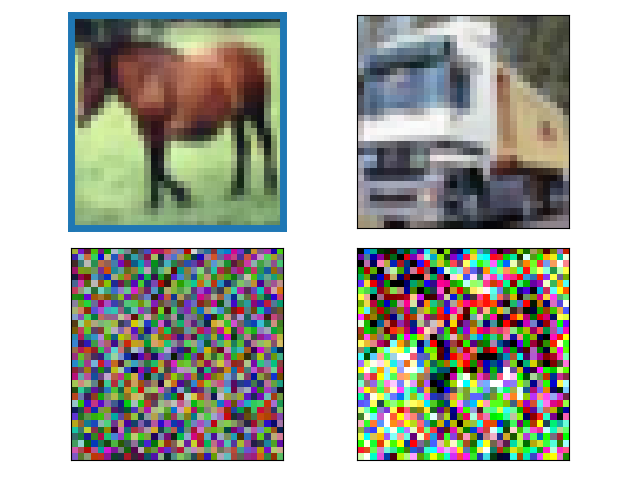

In [173]:
fig=plt.figure()
columns = 2
rows = 2

# ax enables access to manipulate each of subplots
ax = []

images = [img1,img2,img3,img4]

for i in range(columns*rows):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(images[i], vmin=0, vmax=1)
    
    if i==0:
        ax[i].spines['bottom'].set_color('tab:blue')
        ax[i].spines['top'].set_color('tab:blue')
        ax[i].spines['left'].set_color('tab:blue')
        ax[i].spines['right'].set_color('tab:blue') 
        ax[i].spines['bottom'].set_linewidth(5)
        ax[i].spines['top'].set_linewidth(5)
        ax[i].spines['left'].set_linewidth(5)
        ax[i].spines['right'].set_linewidth(5)
    ax[i].tick_params(axis='both', which='both',
                          labelbottom='off', labelleft='off', bottom='off', left='off')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)    
plt.tight_layout()

plt.show()